**Image** **preprocessing**

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1)

In [3]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/train_set',target_size = (128,128),batch_size = 32,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/test_set',target_size = (128,128),batch_size = 32,class_mode = 'categorical')

Found 5354 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing** **Libraries**

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

**Initializing** **Model**

In [5]:
model = Sequential()

**Adding** **CNN** **layers**

Convolution Layer

In [6]:
model.add(Convolution2D(32,(3,3),input_shape = (128,128,3),activation = 'relu'))

Pooling Layer

In [7]:
model.add(MaxPooling2D(pool_size = (2,2)))

Flatten Layer

In [8]:
model.add(Flatten())

Adding Dense Layer

In [9]:
model.add(Dense(40,kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(20,kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(9,kernel_initializer = 'random_uniform', activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 40)                5080360   
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 9)                 189       
                                                        

**Train** **and** **Save** **the** **Model**

In [13]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])
len(x_train)

168

In [32]:
model.fit(x_train,steps_per_epoch= 89,epochs=1,validation_data=x_test,validation_steps= 27)

89/89 [==============================] - 55s 614ms/step - loss: 0.8246 - accuracy: 0.7173 - val_loss: 1098.3207 - val_accuracy: 0.2928


In [16]:
train_loss,train_acc = model.evaluate(x_train,steps = 16)
validation_loss,test_acc = model.evaluate(x_test,steps = 16)

16/16 [==============================] - 3s 186ms/step - loss: 770.2333 - accuracy: 0.3066


In [18]:
print('Train:%.3f,Test:%.3f'%(train_acc,test_acc))

Train:0.705,Test:0.307


In [19]:
model.save('vegetable.h5')

In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('vegetable.h5')

In [24]:
img=image.load_img('/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/train_set/Pepper,_bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG')

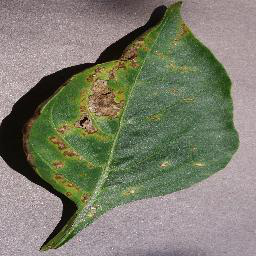

In [25]:
img

In [26]:
img=image.load_img('/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/train_set/Pepper,_bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG',target_size = (128,128))

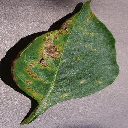

In [27]:
img

In [28]:
x = image.img_to_array(img)

In [29]:
x

array([[[113.,  98., 101.],
        [115., 100., 103.],
        [137., 122., 125.],
        ...,
        [170., 154., 155.],
        [164., 148., 149.],
        [166., 150., 151.]],

       [[113.,  98., 101.],
        [138., 123., 126.],
        [129., 114., 117.],
        ...,
        [170., 154., 155.],
        [168., 152., 153.],
        [163., 147., 148.]],

       [[151., 136., 139.],
        [ 95.,  80.,  83.],
        [ 97.,  82.,  85.],
        ...,
        [172., 156., 157.],
        [169., 153., 154.],
        [176., 160., 161.]],

       ...,

       [[200., 187., 194.],
        [175., 162., 169.],
        [164., 151., 158.],
        ...,
        [165., 152., 161.],
        [167., 154., 163.],
        [176., 163., 172.]],

       [[171., 158., 165.],
        [182., 169., 176.],
        [161., 148., 155.],
        ...,
        [158., 145., 154.],
        [156., 143., 152.],
        [155., 142., 151.]],

       [[167., 154., 161.],
        [213., 200., 207.],
        [161., 1

In [30]:
x = np.expand_dims(x,axis=0)

In [31]:
x

array([[[[113.,  98., 101.],
         [115., 100., 103.],
         [137., 122., 125.],
         ...,
         [170., 154., 155.],
         [164., 148., 149.],
         [166., 150., 151.]],

        [[113.,  98., 101.],
         [138., 123., 126.],
         [129., 114., 117.],
         ...,
         [170., 154., 155.],
         [168., 152., 153.],
         [163., 147., 148.]],

        [[151., 136., 139.],
         [ 95.,  80.,  83.],
         [ 97.,  82.,  85.],
         ...,
         [172., 156., 157.],
         [169., 153., 154.],
         [176., 160., 161.]],

        ...,

        [[200., 187., 194.],
         [175., 162., 169.],
         [164., 151., 158.],
         ...,
         [165., 152., 161.],
         [167., 154., 163.],
         [176., 163., 172.]],

        [[171., 158., 165.],
         [182., 169., 176.],
         [161., 148., 155.],
         ...,
         [158., 145., 154.],
         [156., 143., 152.],
         [155., 142., 151.]],

        [[167., 154., 161.],
       